<a href="https://colab.research.google.com/github/anur8591/ML-Insurance-Cost-Prediction/blob/main/Anur_Linearreg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import files
uploaded = files.upload()

Saving insurance_data.csv to insurance_data (3).csv


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


| Column Name                     | Meaning                             | Type        |
| ------------------------------- | ----------------------------------- | ----------- |
| age                             | Age of the person                   | Numeric     |
| sex                             | Gender (male/female)                | Categorical |
| bmi                             | Body Mass Index                     | Numeric     |
| children                        | Number of children                  | Numeric     |
| smoker                          | Whether person smokes (yes/no)      | Categorical |
| Claim_Amount                    | Insurance claim amount              | Numeric     |
| past_consultations              | Number of past doctor consultations | Numeric     |
| num_of_steps                    | Daily steps (fitness related)       | Numeric     |
| Hospital_expenditure            | Past hospital expenses              | Numeric     |
| NUmber_of_past_hospitalizations | Count of hospitalizations           | Numeric     |
| Anual_Salary                    | Yearly salary                       | Numeric     |
| region                          | Region (southeast, southwest, etc.) | Categorical |
| charges                         | Insurance charges (target variable) | Numeric     |


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [96]:
df.value_counts('region')

,count
region,
southeast,364
northwest,325
southwest,325
northeast,324


In [97]:
df.isnull().sum().sum()

np.int64(52)

In [98]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(df[i].fillna(df[i].mode()[0],inplace = True))
  else:
    print(df[i].fillna(df[i].mean(),inplace = True))

None
None
None
None
None
None
None
None
None
None
None
None
None


/tmp/ipython-input-1667356456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df[i].fillna(df[i].mean(),inplace = True))
/tmp/ipython-input-1667356456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [99]:
df.isnull().sum().sum()

np.int64(0)

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
x = df.drop('charges', axis = 1)
y = df['charges']

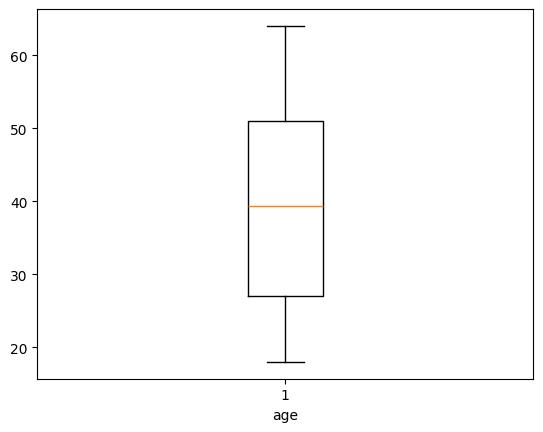

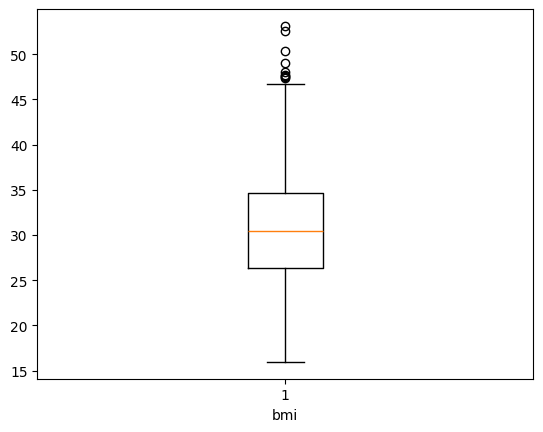

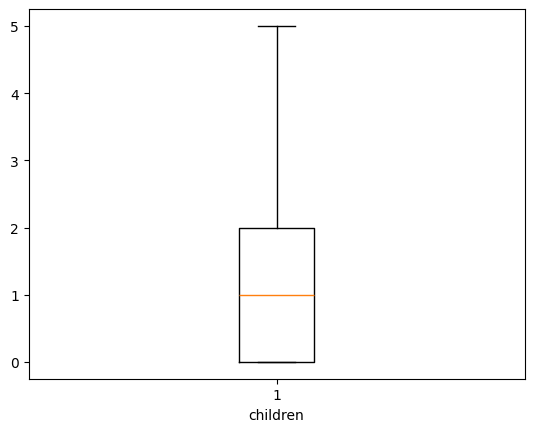

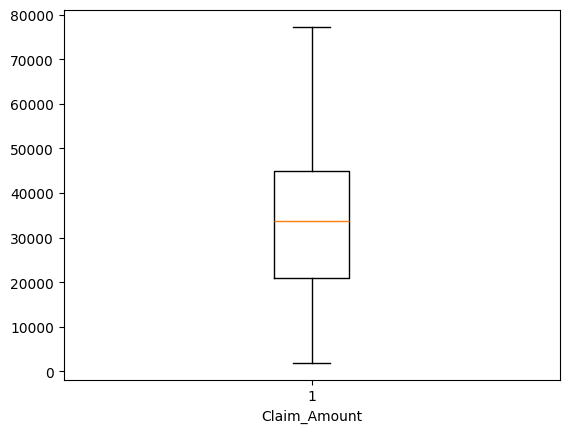

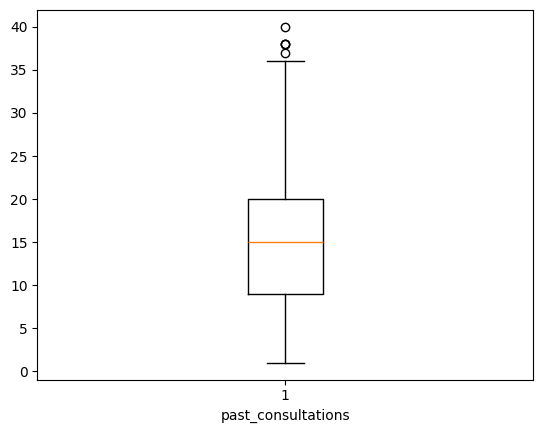

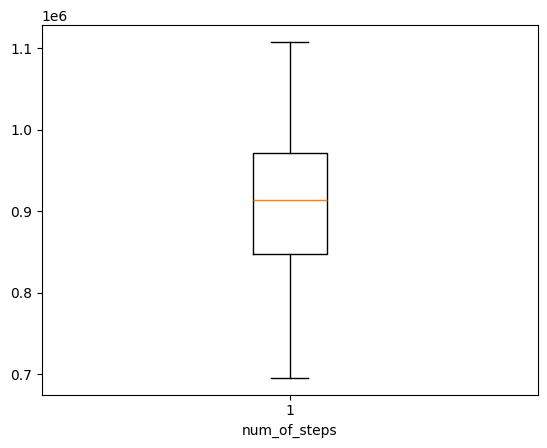

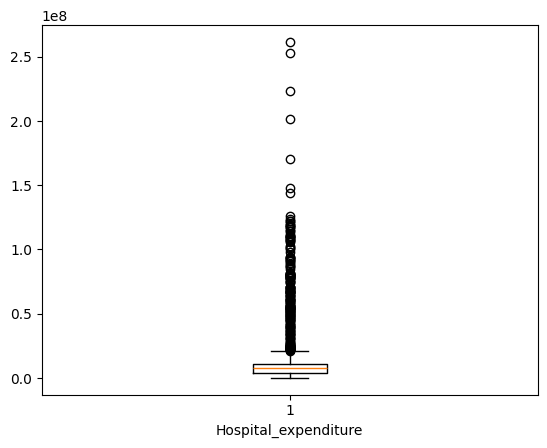

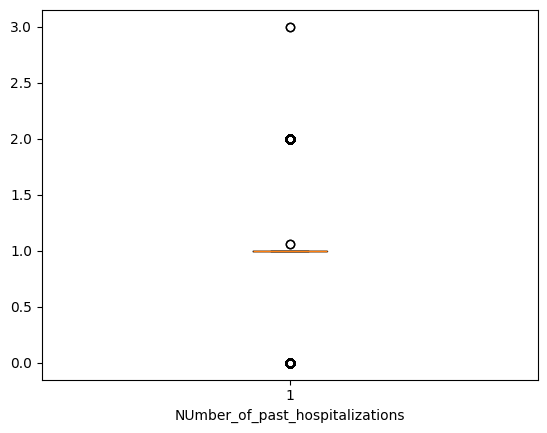

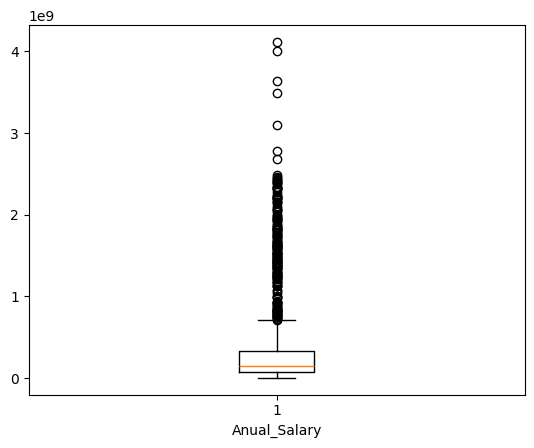

In [102]:
for i in x.columns:
  if x[i].dtype == 'object':
    continue
  plt.boxplot(x[i])
  plt.xlabel(i)
  plt.show()

In [103]:
out = ['age','bmi','children','Claim_Amount','past_consultations','num_of_steps','Hospital_expenditure','Anual_Salary']
out = df[out]
out


,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,3.101107e+09
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,3.484216e+09
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,3.640807e+09
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,4.006359e+09


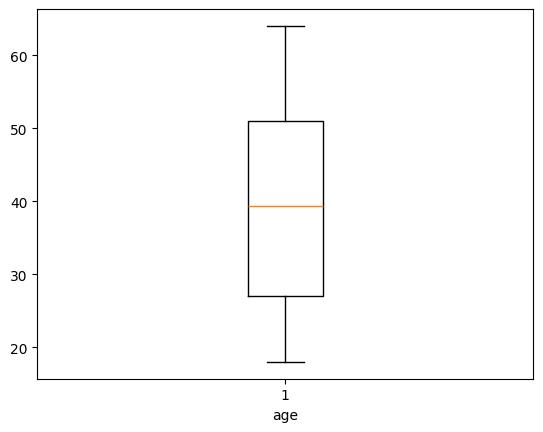

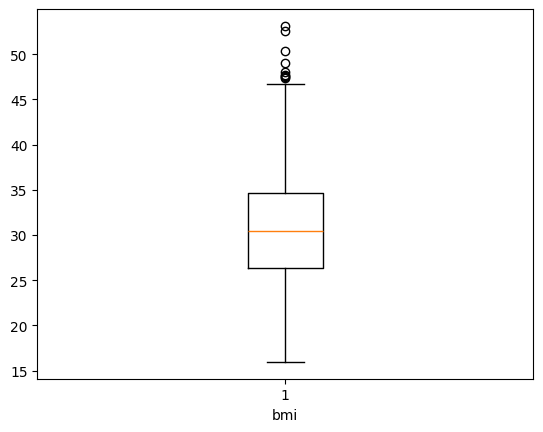

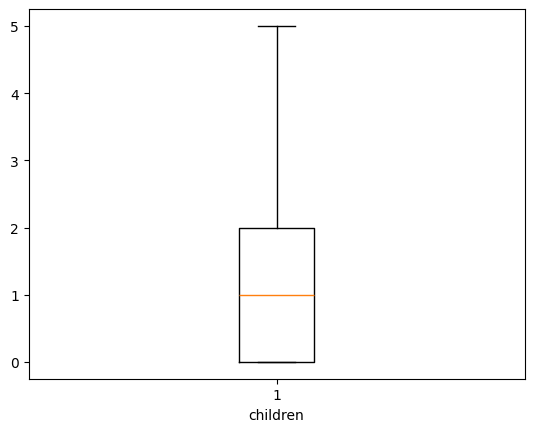

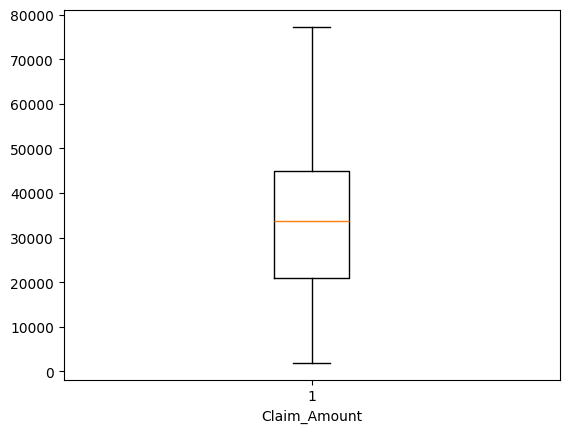

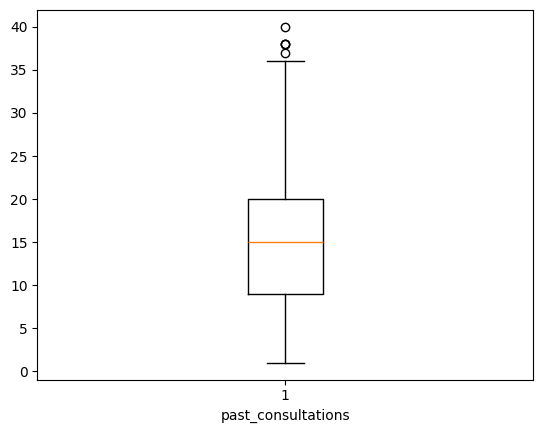

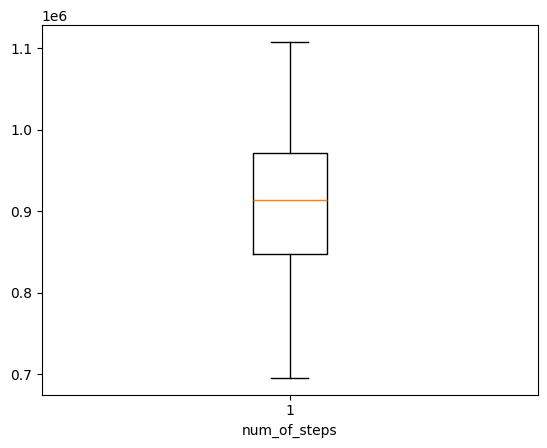

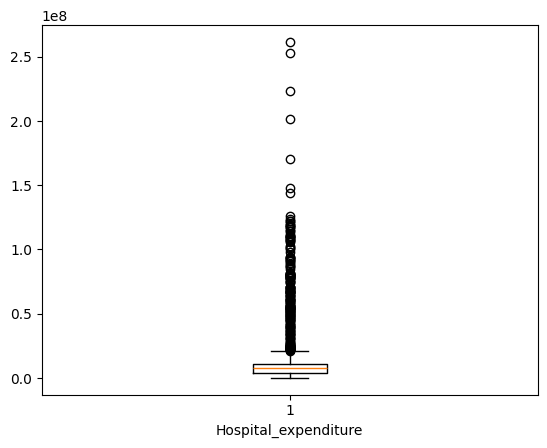

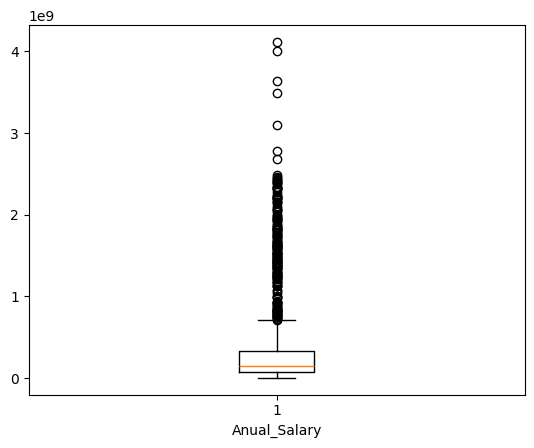

In [104]:
for x in out:
  plt.boxplot(out[x])
  plt.xlabel(x)
  plt.show()

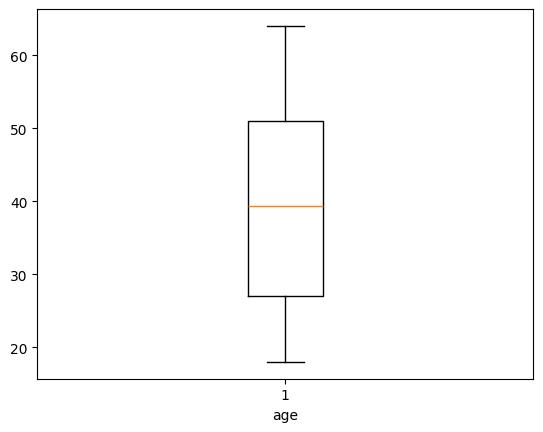

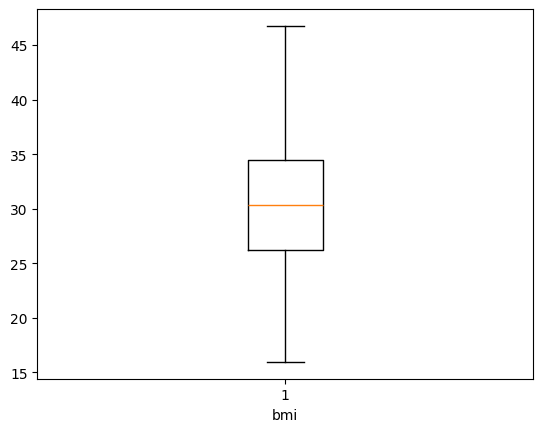

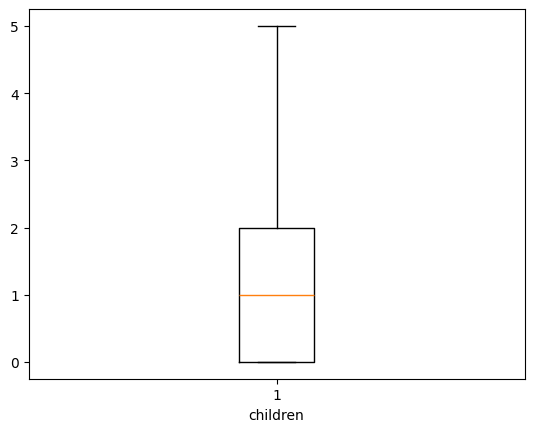

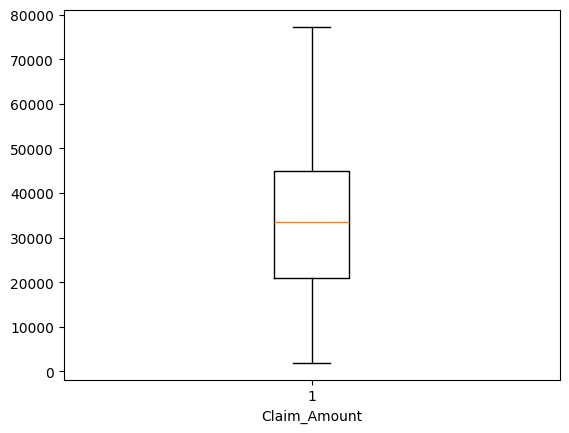

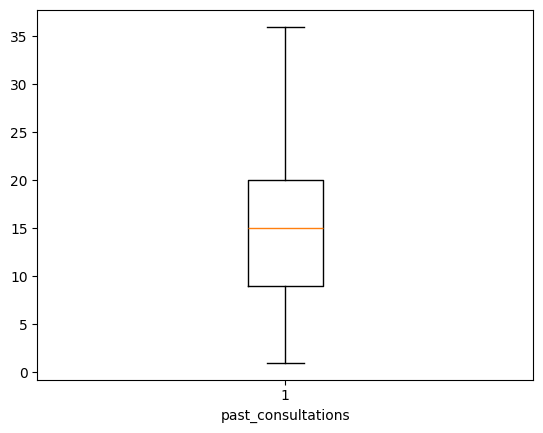

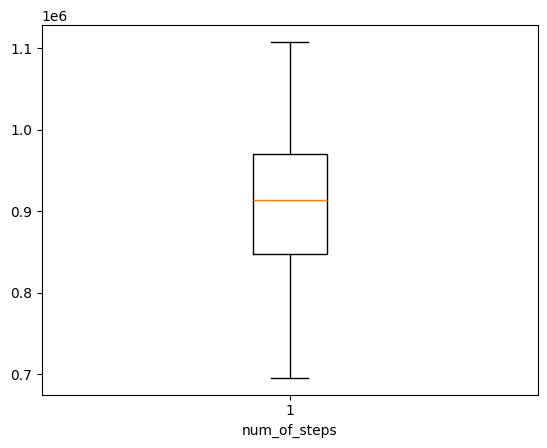

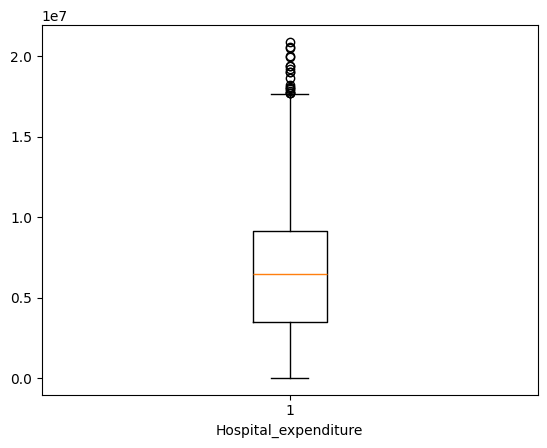

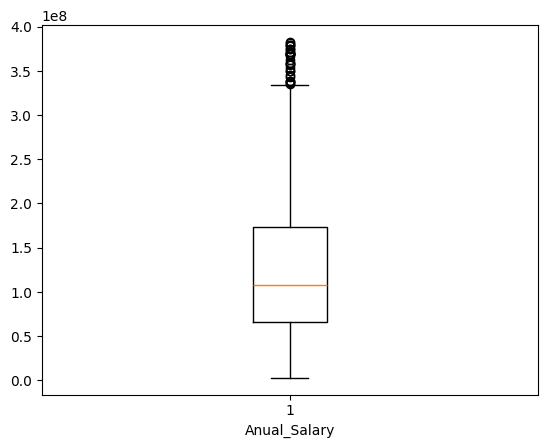

In [105]:
for i in out.columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  Iqr = Q3 - Q1

  lb = Q1 - 1.5 * Iqr
  ub = Q3 + 1.5 * Iqr
  # print(f"this is LB of {i} = {lb}, this is UB of {i} = {ub}")

  df = df[(df[i]>=lb)&(df[i]<=ub)]

  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])


df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


In [107]:
from sklearn.model_selection import train_test_split

In [118]:
# X = df.drop("charges", axis=1)   # change if your target column name is different
# Y = df["charges"]

# another Method use any one use upper one or lower one

X = df.iloc[:,: 12]
y = df.iloc[:, -1]


In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

Now apply standard

In [122]:
from sklearn.preprocessing import StandardScaler

se = StandardScaler()

X_train_scaled = se.fit_transform(X_train)
X_test_scaled = se.transform(X_test)

Convert Back to DataFrame

In [123]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Check If Standardization Worked

In [124]:
X_train_scaled.describe()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
count,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02
mean,4.311546e-17,-9.700978e-17,-4.699585e-16,8.191937e-17,-2.479139e-17,1.121002e-16,-2.479139e-17,1.371072e-15,5.820587e-17,1.724618e-16,-4.311546e-17,8.623091e-17
std,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00
min,-1.478977e+00,-9.975758e-01,-2.381350e+00,-8.750514e-01,-2.042531e-01,-1.933171e+00,-2.007958e+00,-2.538363e+00,-1.883567e+00,-2.470470e+00,-1.520490e+00,-1.345475e+00
25%,-9.089082e-01,-9.975758e-01,-7.352934e-01,-8.750514e-01,-2.042531e-01,-8.638930e-01,-8.406471e-01,-6.971894e-01,-8.515739e-01,4.045201e-01,-7.416531e-01,-6.797395e-01
50%,1.745404e-02,-9.975758e-01,-4.139178e-02,-5.880454e-02,-2.042531e-01,1.013204e-01,-6.853473e-03,1.776535e-01,1.209943e-02,4.045201e-01,-2.185913e-01,4.298194e-01
75%,8.725576e-01,1.002430e+00,6.483844e-01,7.574424e-01,-2.042531e-01,8.146930e-01,8.269402e-01,8.226626e-01,7.832957e-01,4.045201e-01,5.659569e-01,1.317467e+00
max,1.798920e+00,1.002430e+00,2.699561e+00,3.206183e+00,4.895886e+00,2.123690e+00,2.327769e+00,1.753659e+00,3.093184e+00,5.788272e-01,3.140120e+00,1.317467e+00


Now Model Training

In [126]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

Now we need to  test the data to check what values my model can predict

In [128]:
model_prediction = linear_model.predict(X_test)
model_prediction

array([ 1423.44953761,  1469.96518392,  2687.35820135,  1860.51696794,
       13873.92358645, 18812.69554158, 11543.35626025,  3773.67624268,
        4146.16497042,  8206.40842691, 12768.12348125,  8493.65005496,
         870.23935836,  2697.78700702,  6723.49619896,  8076.1709214 ,
       11686.63770707,  8929.32575587, 10823.93302395,  6114.08005374,
        7811.06330036,  5793.08214339,  5113.65300923,  8382.34158888,
        5318.7205309 ,  4773.43580051,  9196.14451051, 13508.55342178,
        7237.66485312,  8116.66000944,  6007.29455456,  7509.47120411,
       10537.79783051,  5865.80293039,  5651.94634007,   863.60947203,
        4290.48959471, 13722.54851423,  8903.65131991,  4467.14058062,
        9143.0079089 ,  9833.13765007, -1614.95001047,  8698.02383454,
        3456.21902837,  3616.26963888,  5463.17288396,  9763.9511499 ,
       11785.36516149, 10600.15362028, 12370.82540118,  9822.50735366,
       12723.1178182 ,  8368.49874866,  4867.99423005,   493.37613335,
      

In [129]:
Y_test

,charges
32,1629.8335
110,2155.6815
137,2396.0959
89,1981.5819
924,13430.2650
...,...
484,6746.7425
547,7537.1639
111,2156.7518
516,7162.0122


now solve the error using =
MSE(Mean Square Error),
RMSE(Root Mean Squared Error),
r2_Score



In [137]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, model_prediction)
print(f"Mean Squared Error = {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error = {rmse}")

r2 = r2_score(Y_test, model_prediction)
print(f"R2_Score = {r2}")
print(f"Accuracy of the Model = {r2 * 100}")

Mean Squared Error = 615024.3512192704
Root Mean Squared Error = 784.2348826845631
R2_Score = 0.969467777821272
Accuracy of the Model = 96.9467777821272


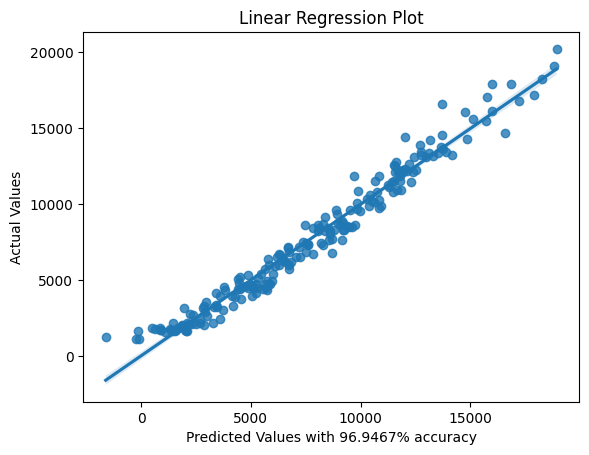

In [139]:
sns.regplot(x = model_prediction, y = Y_test)

plt.xlabel("Predicted Values with 96.9467% accuracy")
plt.ylabel("Actual Values")
plt.title("Linear Regression Plot")
plt.show()